In [1]:
import numpy as np
import pandas as pd
import seaborn  as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification #data_generation
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.model_selection import cross_validate, train_test_split
from sklearn.metrics import confusion_matrix, recall_score, precision_score,f1_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.preprocessing import LabelEncoder
import scipy.stats as scs
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn import svm


## Data Processing

In [2]:
df = pd.read_csv("cancel_train.csv")
pd.set_option("display.max_columns",None)
df.head()

,mon,state,originalagency,speed,wirecenter,InstallType,competitorname,ContractType,salesrepid,order_create_date,canceldate,endclientsystem,hfws_ind,due_date,FIRSTOFFEREDDATE,waitingdayofcustomers,waitingdayforcompany,BUNDLE,BundleType,ONTRequired,ONTInstall,strOrderType,strIsWinbackIndicator,notruckrollrequiredreason,droptype,premisetype,ONTselfinstallcapable,saleschannel,bundlename,smartcart,cancel_ind
0,NY11345685302,NY,REDVENT: REDVENT,FTTP_100M_100M,BREWSTER,TECH INSTALL,COMCAST,MONTHTOMONTH,A001696,2/4/18,NaN,COFEEANYWHERE,NaN,2/6/18,2/6/18,2,0,D,D,N,Y,N,NO,NaN,AERIAL,SFU,N,RED VENTURES,UNKNOWN,0,NaN
1,MD11346031526,MD,CSSC: CSSC,FTTP_1000M_1000M,OWEN BROWN,TECH INSTALL,COMCAST,CONTRACT,A002775,2/5/18,NaN,COA2GO,NaN,2/11/18,2/8/18,3,3,TDV,TDV,N,Y,N,NO,NaN,BURIED,SFU,N,BIG BOX,1000M + TV Mundo + FDV Unlim,0,NaN
2,PA11346211594,PA,ONLINE: ONLINE,FTTP_100M_100M,BRADDOCK,TECH INSTALL,COMCAST,MONTHTOMONTH,239B3PA,2/7/18,NaN,VZCOM,NaN,2/12/18,2/12/18,5,0,D,D,N,Y,N,NO,NaN,AERIAL,SFU,N,ONLINE CON,UNKNOWN,1,NaN
3,VA11346969162,VA,CSSC: CSSC,FTTP_1000M_1000M,DRUMMONDS CORNER,TECH INSTALL,COX COMM,CONTRACT,V660449,2/9/18,NaN,COFEEANYWHERE,NaN,2/16/18,2/15/18,6,1,DV,DV,Y,N,M,NO,NaN,BURIED,SFU,N,CSSC,1000M + Extreme HD - 2014 + NO FDV,0,NaN
4,NY11345471806,NY,ONLINE: ONLINE,FTTP_1000M_1000M,LEVITTOWN,TECH INSTALL,CABLEVISION,CONTRACT,C7962VZ,2/3/18,NaN,VZCOM,NaN,2/15/18,2/13/18,10,2,TDV,TDV,N,Y,N,NO,NaN,AERIAL,SFU,N,ONLINE CON,1000M + Preferred HD 2015 + FDV Unlim,1,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50591 entries, 0 to 50590
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   mon                        50591 non-null  object 
 1   state                      50591 non-null  object 
 2   originalagency             50591 non-null  object 
 3   speed                      50591 non-null  object 
 4   wirecenter                 50583 non-null  object 
 5   InstallType                50591 non-null  object 
 6   competitorname             50535 non-null  object 
 7   ContractType               50591 non-null  object 
 8   salesrepid                 50383 non-null  object 
 9   order_create_date          50591 non-null  object 
 10  canceldate                 6170 non-null   object 
 11  endclientsystem            50412 non-null  object 
 12  hfws_ind                   2164 non-null   object 
 13  due_date                   50359 non-null  obj

In [4]:
df.isnull().sum()

mon                              0
state                            0
originalagency                   0
speed                            0
wirecenter                       8
InstallType                      0
competitorname                  56
ContractType                     0
salesrepid                     208
order_create_date                0
canceldate                   44421
endclientsystem                179
hfws_ind                     48427
due_date                       232
FIRSTOFFEREDDATE              1304
waitingdayofcustomers            0
waitingdayforcompany             0
BUNDLE                        3973
BundleType                    3973
ONTRequired                   3967
ONTInstall                    3967
strOrderType                  3967
strIsWinbackIndicator         3967
notruckrollrequiredreason    48783
droptype                      4080
premisetype                   4082
ONTselfinstallcapable         3967
saleschannel                  3967
bundlename          

In [5]:
df.drop(["canceldate","hfws_ind","BundleType","ONTInstall","strOrderType","strIsWinbackIndicator","notruckrollrequiredreason","premisetype","waitingdayforcompany","FIRSTOFFEREDDATE","due_date","order_create_date","bundlename"],axis=1,inplace=True)


In [6]:
df.head(10)

,mon,state,originalagency,speed,wirecenter,InstallType,competitorname,ContractType,salesrepid,endclientsystem,waitingdayofcustomers,BUNDLE,ONTRequired,droptype,ONTselfinstallcapable,saleschannel,smartcart,cancel_ind
0,NY11345685302,NY,REDVENT: REDVENT,FTTP_100M_100M,BREWSTER,TECH INSTALL,COMCAST,MONTHTOMONTH,A001696,COFEEANYWHERE,2,D,N,AERIAL,N,RED VENTURES,0,NaN
1,MD11346031526,MD,CSSC: CSSC,FTTP_1000M_1000M,OWEN BROWN,TECH INSTALL,COMCAST,CONTRACT,A002775,COA2GO,3,TDV,N,BURIED,N,BIG BOX,0,NaN
2,PA11346211594,PA,ONLINE: ONLINE,FTTP_100M_100M,BRADDOCK,TECH INSTALL,COMCAST,MONTHTOMONTH,239B3PA,VZCOM,5,D,N,AERIAL,N,ONLINE CON,1,NaN
3,VA11346969162,VA,CSSC: CSSC,FTTP_1000M_1000M,DRUMMONDS CORNER,TECH INSTALL,COX COMM,CONTRACT,V660449,COFEEANYWHERE,6,DV,Y,BURIED,N,CSSC,0,NaN
4,NY11345471806,NY,ONLINE: ONLINE,FTTP_1000M_1000M,LEVITTOWN,TECH INSTALL,CABLEVISION,CONTRACT,C7962VZ,VZCOM,10,TDV,N,AERIAL,N,ONLINE CON,1,NaN
5,VA11345543843,VA,ONLINE: ONLINE,FTTP_1000M_1000M,SECOND AVENUE,TECH INSTALL,COMCAST,CONTRACT,PATEKR2,COFEEANYWHERE,3,DV,N,AERIAL,N,CSSC,0,NaN
6,VA11345571342,VA,CSSC: CSSC,FTTP_1000M_1000M,BRADDOCK ROAD,TECH INSTALL,COX COMM,CONTRACT,A001696,COA2GO,5,TDV,N,AERIAL,N,RED VENTURES,0,NaN
7,RI11345574847,RI,RVCART: RED VENTURES CART PAID SEARCH,FTTP_100M_100M,WOONSOCKET,EONTSELFINSTALL,COX COMM,MONTHTOMONTH,A003930,VZCOM,9,D,N,AERIAL,Y,ONLINE CON,0,NaN
8,NY11345490874,NY,ONLINE: ONLINE,FTTP_1000M_1000M,SYRACUSE FAIRMOUNT,TECH INSTALL,TIME WARNER,MONTHTOMONTH,C7962VZ,VZCOM,2,TDV,N,TEMP,N,ONLINE CON,0,NaN
9,DC11345486467,DC,ONLINE: ONLINE,FTTP_1000M_1000M,LINCOLN,TECH INSTALL,COMCAST,CONTRACT,123A0WB,VZCOM,3,TDV,Y,AERIAL,N,ONLINE CON,1,NaN


In [7]:
df["cancel_ind"] = df["cancel_ind"].fillna(value=0)
df["cancel_ind"]

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
50586    1.0
50587    0.0
50588    0.0
50589    1.0
50590    0.0
Name: cancel_ind, Length: 50591, dtype: float64

In [8]:
df.isnull().sum()

mon                         0
state                       0
originalagency              0
speed                       0
wirecenter                  8
InstallType                 0
competitorname             56
ContractType                0
salesrepid                208
endclientsystem           179
waitingdayofcustomers       0
BUNDLE                   3973
ONTRequired              3967
droptype                 4080
ONTselfinstallcapable    3967
saleschannel             3967
smartcart                   0
cancel_ind                  0
dtype: int64

In [9]:
df.dropna(thresh=14,inplace=True)
df.isnull().sum()

mon                        0
state                      0
originalagency             0
speed                      0
wirecenter                 8
InstallType                0
competitorname            55
ContractType               0
salesrepid                37
endclientsystem            7
waitingdayofcustomers      0
BUNDLE                     6
ONTRequired                0
droptype                 113
ONTselfinstallcapable      0
saleschannel               0
smartcart                  0
cancel_ind                 0
dtype: int64

In [10]:
df.dropna(inplace=True)
df.reset_index(drop=True,inplace=True)
df.head()

,mon,state,originalagency,speed,wirecenter,InstallType,competitorname,ContractType,salesrepid,endclientsystem,waitingdayofcustomers,BUNDLE,ONTRequired,droptype,ONTselfinstallcapable,saleschannel,smartcart,cancel_ind
0,NY11345685302,NY,REDVENT: REDVENT,FTTP_100M_100M,BREWSTER,TECH INSTALL,COMCAST,MONTHTOMONTH,A001696,COFEEANYWHERE,2,D,N,AERIAL,N,RED VENTURES,0,0.0
1,MD11346031526,MD,CSSC: CSSC,FTTP_1000M_1000M,OWEN BROWN,TECH INSTALL,COMCAST,CONTRACT,A002775,COA2GO,3,TDV,N,BURIED,N,BIG BOX,0,0.0
2,PA11346211594,PA,ONLINE: ONLINE,FTTP_100M_100M,BRADDOCK,TECH INSTALL,COMCAST,MONTHTOMONTH,239B3PA,VZCOM,5,D,N,AERIAL,N,ONLINE CON,1,0.0
3,VA11346969162,VA,CSSC: CSSC,FTTP_1000M_1000M,DRUMMONDS CORNER,TECH INSTALL,COX COMM,CONTRACT,V660449,COFEEANYWHERE,6,DV,Y,BURIED,N,CSSC,0,0.0
4,NY11345471806,NY,ONLINE: ONLINE,FTTP_1000M_1000M,LEVITTOWN,TECH INSTALL,CABLEVISION,CONTRACT,C7962VZ,VZCOM,10,TDV,N,AERIAL,N,ONLINE CON,1,0.0


In [11]:
df["endclientsystem"].value_counts()

COFEEANYWHERE       25243
VZCOM                9572
COA2GO               8930
iVAPP-Controller     1919
WHATSNEXT             522
SSP_OPS               111
GBCOM                  56
VZOT                   29
PRISM                   9
WKF                     9
IVAPPECMADX             7
ADX                     6
ERDMN                   5
NETXADX                 4
MAT                     2
Name: endclientsystem, dtype: int64

In [12]:
df["mon"].value_counts()
df["state"].value_counts()
df["originalagency"].value_counts()
df["speed"].value_counts()
df["wirecenter"].value_counts()
df["InstallType"].value_counts()
df["competitorname"].value_counts()
df["ContractType"].value_counts()
df["salesrepid"].value_counts()
df["endclientsystem"].value_counts()
df["BUNDLE"].value_counts()
df["ONTRequired"].value_counts()
df["droptype"].value_counts()
df["ONTselfinstallcapable"].value_counts()
df["saleschannel"].value_counts()
df["smartcart"].value_counts()
df["waitingdayofcustomers"].unique()

array(['2', '3', '5', '6', '10', '9', '4', '30', '0', '15', '20', '7',
       '11', '#VALUE!', '1', '13', '17', '12', '14', '8', '27', '31',
       '22', '19', '26', '16', '18', '-7', '34', '46', '23', '33', '25',
       '28', '24', '21', '39', '-3', '32', '29', '40', '36', '38', '44',
       '45', '35', '-5', '47', '-1', '-9', '-8', '37', '41', '43', '51',
       '-11', '49', '-12', '-2', '-19', '-4', '42', '-6'], dtype=object)

In [13]:
df["waitingdayofcustomers"].value_counts()

4      6850
2      5329
5      5241
3      5090
6      4615
       ... 
49        1
-12       1
-2        1
-19       1
-6        1
Name: waitingdayofcustomers, Length: 63, dtype: int64

In [14]:
df["droptype"].iloc[df[df["droptype"]=="Unknown"].index] = "AERIAL"   

pd.options.mode.chained_assignment = None # Size limit uyarısı verdiği için   

C:\Users\potar\AppData\Local\Temp\ipykernel_5688\3127665920.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["droptype"].iloc[df[df["droptype"]=="Unknown"].index] = "AERIAL"


In [15]:
df[df["saleschannel"] == "UNKNOWN"]

,mon,state,originalagency,speed,wirecenter,InstallType,competitorname,ContractType,salesrepid,endclientsystem,waitingdayofcustomers,BUNDLE,ONTRequired,droptype,ONTselfinstallcapable,saleschannel,smartcart,cancel_ind
33,VA11346963302,VA,CSSC: CSSC,FTTP_1000M_1000M,BRADDOCK ROAD,TECH INSTALL,COX COMM,CONTRACT,A002621,COA2GO,4,TDV,N,BURIED,Y,UNKNOWN,1,0.0
46,NY11346911817,NY,CSSC: CSSC,FTTP_1000M_1000M,NORTH STATEN ISLAND,TECH INSTALL,TIME WARNER,CONTRACT,A003247,iVAPP-Controller,4,TDV,N,BURIED,N,UNKNOWN,0,1.0
52,MD11347040652,MD,DISHNET: DISH NETWORK,FTTP_50M_50M,GLEN BURNIE,TECH INSTALL,COMCAST,MONTHTOMONTH,A003640,COFEEANYWHERE,4,D,N,BURIED,N,UNKNOWN,0,0.0
83,NY11347004493,NY,CSSC: CSSC,FTTP_1000M_1000M,NEW ROCHELLE,TECH INSTALL,CABLEVISION,CONTRACT,C9020HN,COA2GO,4,DV,N,MDU_INSIDE,N,UNKNOWN,0,0.0
91,MD11346974459,MD,CSSC: CSSC,FTTP_1000M_1000M,ANNAPOLIS,TECH INSTALL,COMCAST,CONTRACT,A001188,COA2GO,4,DV,Y,AERIAL,N,UNKNOWN,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46356,NY11346323620,NY,CSSC: CSSC,FTTP_50M_50M,WEST 18TH STREET,TECH INSTALL,TIME WARNER,MONTHTOMONTH,A002719,COA2GO,3,DV,Y,MDU_INSIDE,N,UNKNOWN,0,0.0
46367,VA11345176606,VA,CSSC: CSSC,FTTP_100M_100M,INDIAN RIVER ROAD,TECH INSTALL,COX COMM,MONTHTOMONTH,A002347,COA2GO,4,D,N,MDU_INSIDE,N,UNKNOWN,0,0.0
46373,VA11345254878,VA,DISHNET: DISH NETWORK,FTTP_100M_100M,CHINESE CORNER,TECH INSTALL,COX COMM,MONTHTOMONTH,A003640,COFEEANYWHERE,3,D,N,AERIAL,N,UNKNOWN,0,0.0
46379,VA11346490997,VA,RVPROPALCT: RED VENTURES PROP ALCT,FTTP_100M_100M,INDIAN LAKES,TECH INSTALL,COX COMM,MONTHTOMONTH,A004214,COFEEANYWHERE,1,D,N,BURIED,N,UNKNOWN,0,0.0


In [16]:
##df3 = df.groupby(["speed","smartcart"])["saleschannel"].apply(lambda x : x.mode()[0]).rename("saleschannel_mode").reset_index()
##df3

In [17]:
for i in df[df["saleschannel"] == "UNKNOWN"].index :

    try :

        a = df[(df["speed"] == df["speed"].loc[i]) & (df["cancel_ind"] == df["cancel_ind"].loc[i]) & (df["smartcart"] == df["smartcart"].loc[i])]["saleschannel"].mode()[0]

        if a != "UNKNOWN" :

            df["saleschannel"].iloc[i] = a

        else :

            df["saleschannel"].iloc[i] = "CSSC"

    except :

        df["saleschannel"].iloc[i] = "CSSC"

In [18]:
df["saleschannel"].unique()

array(['RED VENTURES', 'BIG BOX', 'ONLINE CON', 'CSSC', 'D2D CON', 'BSBC',
       'INET ACQ CON', 'LA CON', 'SBS', 'INET ACQ BUS', 'OTM CON',
       'EVENTS', 'ONLINE BUS', 'ENG MGRS', 'CUS CARE MEDIUM BUS',
       'OTM BUS', 'OTHER CON', 'FSC', 'OTHER BUS'], dtype=object)

In [19]:
df["waitingdayofcustomers"] = df["waitingdayofcustomers"].replace("#VALUE!",np.NaN)
df["waitingdayofcustomers"].unique()

array(['2', '3', '5', '6', '10', '9', '4', '30', '0', '15', '20', '7',
       '11', nan, '1', '13', '17', '12', '14', '8', '27', '31', '22',
       '19', '26', '16', '18', '-7', '34', '46', '23', '33', '25', '28',
       '24', '21', '39', '-3', '32', '29', '40', '36', '38', '44', '45',
       '35', '-5', '47', '-1', '-9', '-8', '37', '41', '43', '51', '-11',
       '49', '-12', '-2', '-19', '-4', '42', '-6'], dtype=object)

In [20]:
df["waitingdayofcustomers"].isnull().sum()
df.fillna(value = df["waitingdayofcustomers"].median(), inplace=True)


In [21]:
df["waitingdayofcustomers"] = df["waitingdayofcustomers"].astype("int64")


In [22]:
df["waitingdayofcustomers"] = df["waitingdayofcustomers"].apply(lambda x:abs(x))
df["waitingdayofcustomers"]

0         2
1         3
2         5
3         6
4        10
         ..
46419     2
46420     1
46421    29
46422    34
46423    10
Name: waitingdayofcustomers, Length: 46424, dtype: int64

In [23]:
df["salesrepid"].value_counts()

A001696    8186
123A0WB    2350
A003930    2244
C7962VZ    1888
VXVXCAT    1220
           ... 
V335222       1
P904          1
ZAFRMA5       1
b646000       1
PEPITED       1
Name: salesrepid, Length: 4604, dtype: int64

In [24]:
c = pd.crosstab(df.state,df.cancel_ind,margins=True,margins_name="Total")

In [25]:
c

cancel_ind,0.0,1.0,Total
state,,,
CT,21,7,28
DC,649,73,722
DE,714,73,787
MA,2598,283,2881
MD,4633,547,5180
NJ,7157,1081,8238
NY,11780,1817,13597
PA,6285,820,7105
RI,1342,124,1466


In [26]:
scs.chi2_contingency(c)  ##p_value < 0.05 bağımlı değişken

(105.40876058339184,
 1.3397360834096135e-13,
 20,
 array([[2.46905911e+01, 3.30940893e+00, 2.80000000e+01],
        [6.36664527e+02, 8.53354730e+01, 7.22000000e+02],
        [6.93981971e+02, 9.30180295e+01, 7.87000000e+02],
        [2.54048546e+03, 3.40514540e+02, 2.88100000e+03],
        [4.56775935e+03, 6.12240651e+02, 5.18000000e+03],
        [7.26432462e+03, 9.73675383e+02, 8.23800000e+03],
        [1.19899274e+04, 1.60707261e+03, 1.35970000e+04],
        [6.26523748e+03, 8.39762515e+02, 7.10500000e+03],
        [1.29272880e+03, 1.73271196e+02, 1.46600000e+03],
        [5.66119981e+03, 7.58800190e+02, 6.42000000e+03],
        [4.09370000e+04, 5.48700000e+03, 4.64240000e+04]]))

In [27]:
or5 = pd.crosstab(df.originalagency,df.cancel_ind, margins=True, margins_name="Total")
or5

cancel_ind,0.0,1.0,Total
originalagency,,,
BINET: RED VENTURES BINET,19,2,21
BPC: BPC,26,4,30
BSC: BSC,1933,385,2318
BWO: BWO,58,10,68
CELLCON: CELLULAR CONNECTIONS,2,0,2
CLCART: CLEARLINK PARTNERS,241,22,263
CSSC: CSSC,21100,2958,24058
D2DCRED: CREDICO USA LLC.,22,8,30
D2DCYD: DOOR TO DOOR CYDCORE VENDOR,4,0,4


In [28]:
scs.chi2_contingency(or5)    ## p_value < 0.05 bağımlı değişken

(425.7022850483319,
 5.527967937845149e-62,
 48,
 array([[1.85179433e+01, 2.48205669e+00, 2.10000000e+01],
        [2.64542047e+01, 3.54579528e+00, 3.00000000e+01],
        [2.04402822e+03, 2.73971782e+02, 2.31800000e+03],
        [5.99628640e+01, 8.03713596e+00, 6.80000000e+01],
        [1.76361365e+00, 2.36386352e-01, 2.00000000e+00],
        [2.31915195e+02, 3.10848053e+01, 2.63000000e+02],
        [2.12145086e+04, 2.84349143e+03, 2.40580000e+04],
        [2.64542047e+01, 3.54579528e+00, 3.00000000e+01],
        [3.52722730e+00, 4.72772704e-01, 4.00000000e+00],
        [1.71952331e+02, 2.30476693e+01, 1.95000000e+02],
        [8.81806824e-01, 1.18193176e-01, 1.00000000e+00],
        [7.58353869e+01, 1.01646131e+01, 8.60000000e+01],
        [1.76361365e+00, 2.36386352e-01, 2.00000000e+00],
        [7.44156779e+03, 9.97432212e+02, 8.43900000e+03],
        [8.81806824e-01, 1.18193176e-01, 1.00000000e+00],
        [4.49721480e+01, 6.02785197e+00, 5.10000000e+01],
        [2.38969649e+02

In [29]:
sp5 = pd.crosstab(df.speed,df.cancel_ind)
sp5

cancel_ind,0.0,1.0
speed,,
FTTP_1000M_1000M,22165,3363
FTTP_100M_100M,12133,1186
FTTP_10M_2M,3,0
FTTP_150M_150M,1643,288
FTTP_150M_65M,1,0
FTTP_15M_15M,41,3
FTTP_15M_5M_TRUE,48,4
FTTP_20M_10M,25,4
FTTP_20M_5M,18,1


In [30]:
scs.chi2_contingency(sp5)  ##p_value < 0.05 bağımlı değişken

(208.84605735806716,
 5.8788375820269534e-34,
 19,
 array([[2.25107646e+04, 3.01723540e+03],
        [1.17447851e+04, 1.57421491e+03],
        [2.64542047e+00, 3.54579528e-01],
        [1.70276898e+03, 2.28231023e+02],
        [8.81806824e-01, 1.18193176e-01],
        [3.87995003e+01, 5.20049974e+00],
        [4.58539549e+01, 6.14604515e+00],
        [2.55723979e+01, 3.42760210e+00],
        [1.67543297e+01, 2.24567034e+00],
        [1.18162114e+02, 1.58378856e+01],
        [1.05816819e+02, 1.41831811e+01],
        [5.20266026e+01, 6.97339738e+00],
        [3.96813071e+01, 5.31869292e+00],
        [2.02815570e+01, 2.71844305e+00],
        [1.44616319e+02, 1.93836809e+01],
        [8.81806824e-01, 1.18193176e-01],
        [3.52722730e+00, 4.72772704e-01],
        [2.92230781e+03, 3.91692185e+02],
        [7.93626142e+00, 1.06373858e+00],
        [1.43293609e+03, 1.92063911e+02]]))

In [31]:
wi5 = pd.crosstab(df.wirecenter,df.cancel_ind, margins=True, margins_name="Total")
wi5


cancel_ind,0.0,1.0,Total
wirecenter,,,
115TH AVENUE OZONE PARK,168,24,192
14TH AVENUE,32,6,38
71ST STREET,57,10,67
77TH STREET,91,13,104
ABERDEEN,37,7,44
...,...,...,...
YONKERS,216,35,251
YORK MAIN,1,0,1
YORK ROAD,0,1,1


In [32]:
scs.chi2_contingency(wi5)  ##p_value > 0.05 bağımsız değişken

(1110.8043557259846,
 0.999999998741431,
 1404,
 array([[1.69306910e+02, 2.26930898e+01, 1.92000000e+02],
        [3.35086593e+01, 4.49134069e+00, 3.80000000e+01],
        [5.90810572e+01, 7.91894279e+00, 6.70000000e+01],
        ...,
        [8.81806824e-01, 1.18193176e-01, 1.00000000e+00],
        [6.43718982e+01, 8.62810184e+00, 7.30000000e+01],
        [4.09370000e+04, 5.48700000e+03, 4.64240000e+04]]))

In [33]:
ın5 = pd.crosstab(df.InstallType,df.cancel_ind,margins=True,margins_name="Total")
ın5

cancel_ind,0.0,1.0,Total
InstallType,,,
EONT-EGUIDE,126,4,130
EONTSELFINSTALL,1594,213,1807
EONTSTOREPICKUP,887,45,932
RECONNECT,78,5,83
REGRADE,13,0,13
SUPERCEDURE,1456,14,1470
TECH INSTALL,36783,5206,41989
Total,40937,5487,46424


In [34]:
scs.chi2_contingency(ın5)  ##p_value < 0.05 bağımlı değişken

(237.72853224622682,
 9.844066956633213e-43,
 14,
 array([[1.14634887e+02, 1.53651129e+01, 1.30000000e+02],
        [1.59342493e+03, 2.13575069e+02, 1.80700000e+03],
        [8.21843960e+02, 1.10156040e+02, 9.32000000e+02],
        [7.31899664e+01, 9.81003360e+00, 8.30000000e+01],
        [1.14634887e+01, 1.53651129e+00, 1.30000000e+01],
        [1.29625603e+03, 1.73743969e+02, 1.47000000e+03],
        [3.70261867e+04, 4.96281326e+03, 4.19890000e+04],
        [4.09370000e+04, 5.48700000e+03, 4.64240000e+04]]))

In [35]:
com5 = pd.crosstab(df.competitorname,df.cancel_ind,margins=True,margins_name="Total")
com5

cancel_ind,0.0,1.0,Total
competitorname,,,
CABLEVISION,9266,1765,11031
CHARTER,114,12,126
COMCAST,20779,2502,23281
COX COMM,4358,463,4821
HARRON COMMUNICATIONS LP,6,0,6
SCHURZ COMMUNICATIONS INC.,2,1,3
SERVICE ELECTRIC,10,1,11
TIME WARNER,6402,743,7145
Total,40937,5487,46424


In [36]:
scs.chi2_contingency(com5)  # p_value < 0.05 bağımllı değişken

(250.09569049774586,
 4.946723570029401e-44,
 16,
 array([[9.72721108e+03, 1.30378892e+03, 1.10310000e+04],
        [1.11107660e+02, 1.48923402e+01, 1.26000000e+02],
        [2.05293447e+04, 2.75165533e+03, 2.32810000e+04],
        [4.25119070e+03, 5.69809301e+02, 4.82100000e+03],
        [5.29084094e+00, 7.09159056e-01, 6.00000000e+00],
        [2.64542047e+00, 3.54579528e-01, 3.00000000e+00],
        [9.69987506e+00, 1.30012494e+00, 1.10000000e+01],
        [6.30050976e+03, 8.44490242e+02, 7.14500000e+03],
        [4.09370000e+04, 5.48700000e+03, 4.64240000e+04]]))

In [37]:
con5 = pd.crosstab(df.ContractType,df.cancel_ind,margins=True,margins_name="Total")
con5

cancel_ind,0.0,1.0,Total
ContractType,,,
CONTRACT,22396,3454,25850
MONTHTOMONTH,18541,2033,20574
Total,40937,5487,46424


In [38]:
scs.chi2_contingency(con5) # p_value < 0.05 bağımllı değişken

(133.13855362568427,
 8.300030468615285e-28,
 4,
 array([[22794.70640186,  3055.29359814, 25850.        ],
        [18142.29359814,  2431.70640186, 20574.        ],
        [40937.        ,  5487.        , 46424.        ]]))

In [39]:
sal5 = pd.crosstab(df.salesrepid,df.cancel_ind,margins=True,margins_name="Total")
sal5


cancel_ind,0.0,1.0,Total
salesrepid,,,
101A4ZZ,1,0,1
114B7NN,4,1,5
123A0WB,2220,130,2350
123AADC,2,0,2
123AAMD,6,0,6
...,...,...,...
v987456,0,1,1
v998957,2,0,2
vz_recap,3,0,3


In [40]:
scs.chi2_contingency(sal5)    ## p_value > 0.05 bağımsız değişken

(6511.774680949644,
 1.0,
 9208,
 array([[8.81806824e-01, 1.18193176e-01, 1.00000000e+00],
        [4.40903412e+00, 5.90965880e-01, 5.00000000e+00],
        [2.07224604e+03, 2.77753963e+02, 2.35000000e+03],
        ...,
        [2.64542047e+00, 3.54579528e-01, 3.00000000e+00],
        [4.60303162e+02, 6.16968378e+01, 5.22000000e+02],
        [4.09370000e+04, 5.48700000e+03, 4.64240000e+04]]))

In [41]:
end5 = pd.crosstab(df.endclientsystem,df.cancel_ind,margins=True,margins_name="Total")
end5

cancel_ind,0.0,1.0,Total
endclientsystem,,,
ADX,0,6,6
COA2GO,8924,6,8930
COFEEANYWHERE,21837,3406,25243
ERDMN,0,5,5
GBCOM,56,0,56
IVAPPECMADX,0,7,7
MAT,0,2,2
NETXADX,0,4,4
PRISM,0,9,9


In [42]:
scs.chi2_contingency(end5)   # p_value < 0.05 bağımllı değişken

(18067.383799578904,
 0.0,
 30,
 array([[5.29084094e+00, 7.09159056e-01, 6.00000000e+00],
        [7.87453494e+03, 1.05546506e+03, 8.93000000e+03],
        [2.22594497e+04, 2.98355034e+03, 2.52430000e+04],
        [4.40903412e+00, 5.90965880e-01, 5.00000000e+00],
        [4.93811821e+01, 6.61881785e+00, 5.60000000e+01],
        [6.17264777e+00, 8.27352232e-01, 7.00000000e+00],
        [1.76361365e+00, 2.36386352e-01, 2.00000000e+00],
        [3.52722730e+00, 4.72772704e-01, 4.00000000e+00],
        [7.93626142e+00, 1.06373858e+00, 9.00000000e+00],
        [9.78805575e+01, 1.31194425e+01, 1.11000000e+02],
        [8.44065492e+03, 1.13134508e+03, 9.57200000e+03],
        [2.55723979e+01, 3.42760210e+00, 2.90000000e+01],
        [4.60303162e+02, 6.16968378e+01, 5.22000000e+02],
        [7.93626142e+00, 1.06373858e+00, 9.00000000e+00],
        [1.69218730e+03, 2.26812705e+02, 1.91900000e+03],
        [4.09370000e+04, 5.48700000e+03, 4.64240000e+04]]))

In [43]:
wai5 = pd.crosstab(df.waitingdayofcustomers,df.cancel_ind,margins=True,margins_name="Total")
wai5

cancel_ind,0.0,1.0,Total
waitingdayofcustomers,,,
0,2149,45,2194
1,3836,357,4193
2,4839,491,5330
3,4587,508,5095
4,6819,970,7789
5,4560,683,5243
6,4013,603,4616
7,3362,595,3957
8,1498,254,1752


In [44]:
scs.chi2_contingency(wai5)  # p_value < 0.05 bağımllı değişken

(525.6792095675187,
 5.249251690544589e-59,
 100,
 array([[1.93468417e+03, 2.59315828e+02, 2.19400000e+03],
        [3.69741601e+03, 4.95583987e+02, 4.19300000e+03],
        [4.70003037e+03, 6.29969628e+02, 5.33000000e+03],
        [4.49280577e+03, 6.02194231e+02, 5.09500000e+03],
        [6.86839335e+03, 9.20606647e+02, 7.78900000e+03],
        [4.62331318e+03, 6.19686821e+02, 5.24300000e+03],
        [4.07042030e+03, 5.45579700e+02, 4.61600000e+03],
        [3.48930960e+03, 4.67690397e+02, 3.95700000e+03],
        [1.54492556e+03, 2.07074444e+02, 1.75200000e+03],
        [1.08374059e+03, 1.45259413e+02, 1.22900000e+03],
        [9.02088381e+02, 1.20911619e+02, 1.02300000e+03],
        [6.03155868e+02, 8.08441323e+01, 6.84000000e+02],
        [4.99102662e+02, 6.68973376e+01, 5.66000000e+02],
        [4.68239424e+02, 6.27605764e+01, 5.31000000e+02],
        [3.73004287e+02, 4.99957134e+01, 4.23000000e+02],
        [3.50959116e+02, 4.70408840e+01, 3.98000000e+02],
        [1.63134262e+0

In [45]:
bun5 = pd.crosstab(df.BUNDLE,df.cancel_ind,margins=True,margins_name="Total")
bun5

cancel_ind,0.0,1.0,Total
BUNDLE,,,
D,15301,1534,16835
DT,1,0,1
DV,4983,546,5529
T,0,1,1
TD,1573,299,1872
TDV,19069,3105,22174
TV,2,0,2
V,8,2,10
Total,40937,5487,46424


In [46]:
scs.chi2_contingency(bun5)  # p_value < 0.05 bağımllı değişken

(279.36895167181535,
 4.694263405342824e-50,
 16,
 array([[1.48452179e+04, 1.98978212e+03, 1.68350000e+04],
        [8.81806824e-01, 1.18193176e-01, 1.00000000e+00],
        [4.87550993e+03, 6.53490070e+02, 5.52900000e+03],
        [8.81806824e-01, 1.18193176e-01, 1.00000000e+00],
        [1.65074237e+03, 2.21257625e+02, 1.87200000e+03],
        [1.95531845e+04, 2.62081548e+03, 2.21740000e+04],
        [1.76361365e+00, 2.36386352e-01, 2.00000000e+00],
        [8.81806824e+00, 1.18193176e+00, 1.00000000e+01],
        [4.09370000e+04, 5.48700000e+03, 4.64240000e+04]]))

In [47]:
ont5 = pd.crosstab(df.ONTRequired,df.cancel_ind,margins=True,margins_name="Total")
ont5

cancel_ind,0.0,1.0,Total
ONTRequired,,,
N,23052,2573,25625
Y,17885,2914,20799
Total,40937,5487,46424


In [48]:
scs.chi2_contingency(ont5)   # p_value < 0.05 bağımllı değişken

(173.55162414205302,
 1.807667337880319e-36,
 4,
 array([[22596.29986645,  3028.70013355, 25625.        ],
        [18340.70013355,  2458.29986645, 20799.        ],
        [40937.        ,  5487.        , 46424.        ]]))

In [49]:
dro5 = pd.crosstab(df.droptype,df.cancel_ind,margins=True,margins_name="Total")
dro5

cancel_ind,0.0,1.0,Total
droptype,,,
AERIAL,20794,3043,23837
BURIED,7242,846,8088
INSIDE,4,0,4
MDU,1718,248,1966
MDU_INSIDE,9114,1049,10163
MDU_OUTSIDE,1330,199,1529
NOTPLACED,28,5,33
TEMP,103,15,118
UNDERGROUND,604,82,686


In [50]:
scs.chi2_contingency(dro5)  # p_value < 0.05 bağımllı değişken

(60.98035294708562,
 1.4193074871661771e-06,
 18,
 array([[2.10196293e+04, 2.81737073e+03, 2.38370000e+04],
        [7.13205359e+03, 9.55946407e+02, 8.08800000e+03],
        [3.52722730e+00, 4.72772704e-01, 4.00000000e+00],
        [1.73363222e+03, 2.32367784e+02, 1.96600000e+03],
        [8.96180275e+03, 1.20119725e+03, 1.01630000e+04],
        [1.34828263e+03, 1.80717366e+02, 1.52900000e+03],
        [2.90996252e+01, 3.90037481e+00, 3.30000000e+01],
        [1.04053205e+02, 1.39467948e+01, 1.18000000e+02],
        [6.04919481e+02, 8.10805187e+01, 6.86000000e+02],
        [4.09370000e+04, 5.48700000e+03, 4.64240000e+04]]))

In [51]:
on5 = pd.crosstab(df.ONTselfinstallcapable,df.cancel_ind,margins=True,margins_name="Total")
on5

cancel_ind,0.0,1.0,Total
ONTselfinstallcapable,,,
N,34955,4647,39602
Y,5982,840,6822
Total,40937,5487,46424


In [52]:
scs.chi2_contingency(on5)  # p_value > 0.05 bağımsız değişken

(1.8709006123003122,
 0.7594883543418454,
 4,
 array([[34921.31384629,  4680.68615371, 39602.        ],
        [ 6015.68615371,   806.31384629,  6822.        ],
        [40937.        ,  5487.        , 46424.        ]]))

In [53]:
sal5 = pd.crosstab(df.saleschannel,df.cancel_ind,margins=True,margins_name="Total")
sal5

cancel_ind,0.0,1.0,Total
saleschannel,,,
BIG BOX,739,218,957
BSBC,1227,191,1418
CSSC,10741,1008,11749
CUS CARE MEDIUM BUS,142,21,163
D2D CON,4807,1361,6168
ENG MGRS,221,11,232
EVENTS,219,11,230
FSC,3,0,3
INET ACQ BUS,316,68,384


In [54]:
scs.chi2_contingency(sal5)   # p_value < 0.05 bağımllı değişken

(1176.8913628235132,
 3.1851480862805366e-222,
 38,
 array([[8.43889131e+02, 1.13110869e+02, 9.57000000e+02],
        [1.25040208e+03, 1.67597923e+02, 1.41800000e+03],
        [1.03603484e+04, 1.38865162e+03, 1.17490000e+04],
        [1.43734512e+02, 1.92654877e+01, 1.63000000e+02],
        [5.43898449e+03, 7.29015509e+02, 6.16800000e+03],
        [2.04579183e+02, 2.74208168e+01, 2.32000000e+02],
        [2.02815570e+02, 2.71844305e+01, 2.30000000e+02],
        [2.64542047e+00, 3.54579528e-01, 3.00000000e+00],
        [3.38613820e+02, 4.53861796e+01, 3.84000000e+02],
        [1.37826407e+03, 1.84735934e+02, 1.56300000e+03],
        [5.01748083e+02, 6.72519171e+01, 5.69000000e+02],
        [5.90810572e+01, 7.91894279e+00, 6.70000000e+01],
        [1.01354876e+04, 1.35851236e+03, 1.14940000e+04],
        [8.81806824e-01, 1.18193176e-01, 1.00000000e+00],
        [1.14634887e+01, 1.53651129e+00, 1.30000000e+01],
        [1.35798251e+02, 1.82017491e+01, 1.54000000e+02],
        [2.20451706e

In [55]:
sma5 = pd.crosstab(df.smartcart,df.cancel_ind,margins=True,margins_name="Total")
sma5


cancel_ind,0.0,1.0,Total
smartcart,,,
0,26370,4187,30557
1,14567,1300,15867
Total,40937,5487,46424


In [56]:
scs.chi2_contingency(sma5)  # p_value < 0.05 bağımllı değişken

(304.1356193091807,
 1.3889072968185045e-64,
 4,
 array([[26945.3711227,  3611.6288773, 30557.       ],
        [13991.6288773,  1875.3711227, 15867.       ],
        [40937.       ,  5487.       , 46424.       ]]))

## mon, wirecenter, salesrepid, ONTselfinstallcapable ki-kare testiyle (p_value değerleri 0.05'den büyük olduğu için) bağımsız değişkenler

In [57]:
df.drop(["mon","wirecenter","salesrepid","ONTselfinstallcapable"],axis=1,inplace=True)

In [58]:
df.head()

,state,originalagency,speed,InstallType,competitorname,ContractType,endclientsystem,waitingdayofcustomers,BUNDLE,ONTRequired,droptype,saleschannel,smartcart,cancel_ind
0,NY,REDVENT: REDVENT,FTTP_100M_100M,TECH INSTALL,COMCAST,MONTHTOMONTH,COFEEANYWHERE,2,D,N,AERIAL,RED VENTURES,0,0.0
1,MD,CSSC: CSSC,FTTP_1000M_1000M,TECH INSTALL,COMCAST,CONTRACT,COA2GO,3,TDV,N,BURIED,BIG BOX,0,0.0
2,PA,ONLINE: ONLINE,FTTP_100M_100M,TECH INSTALL,COMCAST,MONTHTOMONTH,VZCOM,5,D,N,AERIAL,ONLINE CON,1,0.0
3,VA,CSSC: CSSC,FTTP_1000M_1000M,TECH INSTALL,COX COMM,CONTRACT,COFEEANYWHERE,6,DV,Y,BURIED,CSSC,0,0.0
4,NY,ONLINE: ONLINE,FTTP_1000M_1000M,TECH INSTALL,CABLEVISION,CONTRACT,VZCOM,10,TDV,N,AERIAL,ONLINE CON,1,0.0


## Machine Learning için sütunların sayısal verilere dönüştürülmesi

In [59]:
df["ONTRequired"].replace({"N":0,"Y":1}, inplace=True)
df.head()

,state,originalagency,speed,InstallType,competitorname,ContractType,endclientsystem,waitingdayofcustomers,BUNDLE,ONTRequired,droptype,saleschannel,smartcart,cancel_ind
0,NY,REDVENT: REDVENT,FTTP_100M_100M,TECH INSTALL,COMCAST,MONTHTOMONTH,COFEEANYWHERE,2,D,0,AERIAL,RED VENTURES,0,0.0
1,MD,CSSC: CSSC,FTTP_1000M_1000M,TECH INSTALL,COMCAST,CONTRACT,COA2GO,3,TDV,0,BURIED,BIG BOX,0,0.0
2,PA,ONLINE: ONLINE,FTTP_100M_100M,TECH INSTALL,COMCAST,MONTHTOMONTH,VZCOM,5,D,0,AERIAL,ONLINE CON,1,0.0
3,VA,CSSC: CSSC,FTTP_1000M_1000M,TECH INSTALL,COX COMM,CONTRACT,COFEEANYWHERE,6,DV,1,BURIED,CSSC,0,0.0
4,NY,ONLINE: ONLINE,FTTP_1000M_1000M,TECH INSTALL,CABLEVISION,CONTRACT,VZCOM,10,TDV,0,AERIAL,ONLINE CON,1,0.0


In [60]:
df["ContractType"].replace({"MONTHTOMONTH":0,"CONTRACT":1}, inplace=True)
df.head()


,state,originalagency,speed,InstallType,competitorname,ContractType,endclientsystem,waitingdayofcustomers,BUNDLE,ONTRequired,droptype,saleschannel,smartcart,cancel_ind
0,NY,REDVENT: REDVENT,FTTP_100M_100M,TECH INSTALL,COMCAST,0,COFEEANYWHERE,2,D,0,AERIAL,RED VENTURES,0,0.0
1,MD,CSSC: CSSC,FTTP_1000M_1000M,TECH INSTALL,COMCAST,1,COA2GO,3,TDV,0,BURIED,BIG BOX,0,0.0
2,PA,ONLINE: ONLINE,FTTP_100M_100M,TECH INSTALL,COMCAST,0,VZCOM,5,D,0,AERIAL,ONLINE CON,1,0.0
3,VA,CSSC: CSSC,FTTP_1000M_1000M,TECH INSTALL,COX COMM,1,COFEEANYWHERE,6,DV,1,BURIED,CSSC,0,0.0
4,NY,ONLINE: ONLINE,FTTP_1000M_1000M,TECH INSTALL,CABLEVISION,1,VZCOM,10,TDV,0,AERIAL,ONLINE CON,1,0.0


In [61]:
df2 = pd.get_dummies(df,columns=["state","originalagency","speed","InstallType","competitorname","endclientsystem","BUNDLE","droptype","saleschannel"])
df2.columns

Index(['ContractType', 'waitingdayofcustomers', 'ONTRequired', 'smartcart',
       'cancel_ind', 'state_CT', 'state_DC', 'state_DE', 'state_MA',
       'state_MD',
       ...
       'saleschannel_INET ACQ CON', 'saleschannel_LA CON',
       'saleschannel_ONLINE BUS', 'saleschannel_ONLINE CON',
       'saleschannel_OTHER BUS', 'saleschannel_OTHER CON',
       'saleschannel_OTM BUS', 'saleschannel_OTM CON',
       'saleschannel_RED VENTURES', 'saleschannel_SBS'],
      dtype='object', length=125)

In [62]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46424 entries, 0 to 46423
Columns: 125 entries, ContractType to saleschannel_SBS
dtypes: float64(1), int64(4), uint8(120)
memory usage: 7.1 MB


In [74]:
scaler = MinMaxScaler()
df2["waitingdayofcustomers"] = scaler.fit_transform(df2[["waitingdayofcustomers"]])

In [75]:
df2

,ContractType,waitingdayofcustomers,ONTRequired,smartcart,cancel_ind,state_CT,state_DC,state_DE,state_MA,state_MD,state_NJ,state_NY,state_PA,state_RI,state_VA,originalagency_BINET: RED VENTURES BINET,originalagency_BPC: BPC,originalagency_BSC: BSC,originalagency_BWO: BWO,originalagency_CELLCON: CELLULAR CONNECTIONS,originalagency_CLCART: CLEARLINK PARTNERS,originalagency_CSSC: CSSC,originalagency_D2DCRED: CREDICO USA LLC.,originalagency_D2DCYD: DOOR TO DOOR CYDCORE VENDOR,originalagency_DISHNET: DISH NETWORK,originalagency_GW01: GOWIRELESS,originalagency_INFINITY: INFINITY SALES GROUP,originalagency_LAOSCYD: CYDCOR WALMART EMA OS,originalagency_ONLINE: ONLINE,originalagency_OTMANY: ANY COMMUNICATIONS OTM,originalagency_REDMKT: RED VENTURES MARKETING,originalagency_REDNONBR: RED VENTURES NONBRAND,originalagency_REDVENT: REDVENT,originalagency_RVCART: RED VENTURES CART PAID SEARCH,originalagency_RVPROPALCT: RED VENTURES PROP ALCT,originalagency_SBS: SMALL BUSINESS SOLUTIONS -- INTERNAL BD2D,originalagency_TELESALES: TELESALES,originalagency_VECUST: USTCI VEC,originalagency_WZON: WIRELESS ZONE,speed_FTTP_1000M_1000M,speed_FTTP_100M_100M,speed_FTTP_10M_2M,speed_FTTP_150M_150M,speed_FTTP_150M_65M,speed_FTTP_15M_15M,speed_FTTP_15M_5M_TRUE,speed_FTTP_20M_10M,speed_FTTP_20M_5M,speed_FTTP_25M_25M,speed_FTTP_300M_300M,speed_FTTP_30M_5M,speed_FTTP_3M_1M,speed_FTTP_500M_500M,speed_FTTP_50M_10M,speed_FTTP_50M_25M,speed_FTTP_50M_35M,speed_FTTP_50M_50M,speed_FTTP_75M_35M,speed_FTTP_75M_75M,InstallType_EONT-EGUIDE,InstallType_EONTSELFINSTALL,InstallType_EONTSTOREPICKUP,InstallType_RECONNECT,InstallType_REGRADE,InstallType_SUPERCEDURE,InstallType_TECH INSTALL,competitorname_CABLEVISION,competitorname_CHARTER,competitorname_COMCAST,competitorname_COX COMM,competitorname_HARRON COMMUNICATIONS LP,competitorname_SCHURZ COMMUNICATIONS INC.,competitorname_SERVICE ELECTRIC,competitorname_TIME WARNER,endclientsystem_ADX,endclientsystem_COA2GO,endclientsystem_COFEEANYWHERE,endclientsystem_ERDMN,endclientsystem_GBCOM,endclientsystem_IVAPPECMADX,endclientsystem_MAT,endclientsystem_NETXADX,endclientsystem_PRISM,endclientsystem_SSP_OPS,endclientsystem_VZCOM,endclientsystem_VZOT,endclientsystem_WHATSNEXT,endclientsystem_WKF,endclientsystem_iVAPP-Controller,BUNDLE_D,BUNDLE_DT,BUNDLE_DV,BUNDLE_T,BUNDLE_TD,BUNDLE_TDV,BUNDLE_TV,BUNDLE_V,droptype_AERIAL,droptype_BURIED,droptype_INSIDE,droptype_MDU,droptype_MDU_INSIDE,droptype_MDU_OUTSIDE,droptype_NOTPLACED,droptype_TEMP,droptype_UNDERGROUND,saleschannel_BIG BOX,saleschannel_BSBC,saleschannel_CSSC,saleschannel_CUS CARE MEDIUM BUS,saleschannel_D2D CON,saleschannel_ENG MGRS,saleschannel_EVENTS,saleschannel_FSC,saleschannel_INET ACQ BUS,saleschannel_INET ACQ CON,saleschannel_LA CON,saleschannel_ONLINE BUS,saleschannel_ONLINE CON,saleschannel_OTHER BUS,saleschannel_OTHER CON,saleschannel_OTM BUS,saleschannel_OTM CON,saleschannel_RED VENTURES,saleschannel_SBS
0,0,0.039216,0,0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,1,0.058824,0,0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0.098039,0,1,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,1,0.117647,1,0,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0.196078,0,1,0.0,0,0,0,0,0,0,1,

## Machine-Learning Fit,Train ve Test

<AxesSubplot:>

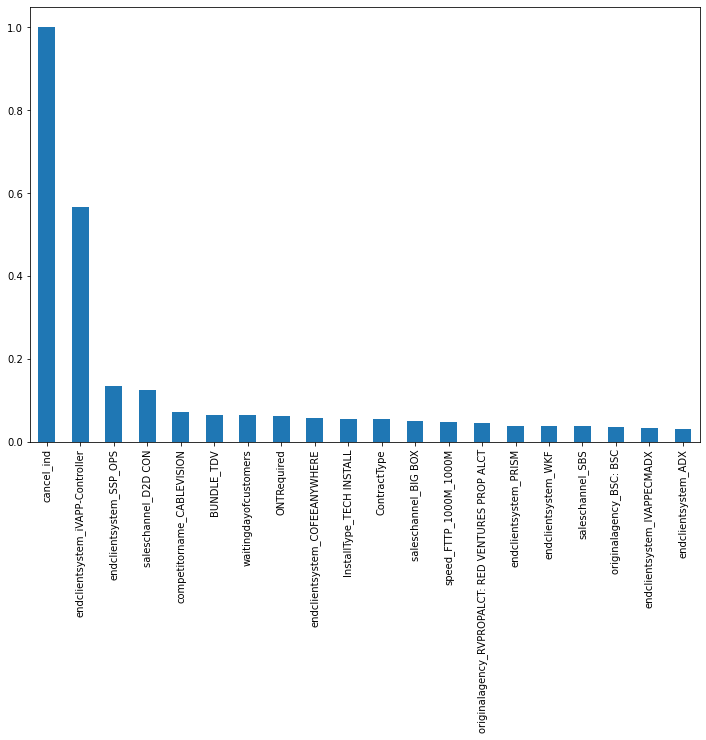

In [76]:
plt.figure(figsize = (12,8))
df2.corr()["cancel_ind"].sort_values(ascending=False)[:20].abs().plot(kind="bar")

In [77]:
df["endclientsystem"].value_counts()

COFEEANYWHERE       25243
VZCOM                9572
COA2GO               8930
iVAPP-Controller     1919
WHATSNEXT             522
SSP_OPS               111
GBCOM                  56
VZOT                   29
PRISM                   9
WKF                     9
IVAPPECMADX             7
ADX                     6
ERDMN                   5
NETXADX                 4
MAT                     2
Name: endclientsystem, dtype: int64

In [65]:
X = df2.drop("cancel_ind",axis=1)
y = df2["cancel_ind"]

In [66]:
X

,ContractType,waitingdayofcustomers,ONTRequired,smartcart,state_CT,state_DC,state_DE,state_MA,state_MD,state_NJ,state_NY,state_PA,state_RI,state_VA,originalagency_BINET: RED VENTURES BINET,originalagency_BPC: BPC,originalagency_BSC: BSC,originalagency_BWO: BWO,originalagency_CELLCON: CELLULAR CONNECTIONS,originalagency_CLCART: CLEARLINK PARTNERS,originalagency_CSSC: CSSC,originalagency_D2DCRED: CREDICO USA LLC.,originalagency_D2DCYD: DOOR TO DOOR CYDCORE VENDOR,originalagency_DISHNET: DISH NETWORK,originalagency_GW01: GOWIRELESS,originalagency_INFINITY: INFINITY SALES GROUP,originalagency_LAOSCYD: CYDCOR WALMART EMA OS,originalagency_ONLINE: ONLINE,originalagency_OTMANY: ANY COMMUNICATIONS OTM,originalagency_REDMKT: RED VENTURES MARKETING,originalagency_REDNONBR: RED VENTURES NONBRAND,originalagency_REDVENT: REDVENT,originalagency_RVCART: RED VENTURES CART PAID SEARCH,originalagency_RVPROPALCT: RED VENTURES PROP ALCT,originalagency_SBS: SMALL BUSINESS SOLUTIONS -- INTERNAL BD2D,originalagency_TELESALES: TELESALES,originalagency_VECUST: USTCI VEC,originalagency_WZON: WIRELESS ZONE,speed_FTTP_1000M_1000M,speed_FTTP_100M_100M,speed_FTTP_10M_2M,speed_FTTP_150M_150M,speed_FTTP_150M_65M,speed_FTTP_15M_15M,speed_FTTP_15M_5M_TRUE,speed_FTTP_20M_10M,speed_FTTP_20M_5M,speed_FTTP_25M_25M,speed_FTTP_300M_300M,speed_FTTP_30M_5M,speed_FTTP_3M_1M,speed_FTTP_500M_500M,speed_FTTP_50M_10M,speed_FTTP_50M_25M,speed_FTTP_50M_35M,speed_FTTP_50M_50M,speed_FTTP_75M_35M,speed_FTTP_75M_75M,InstallType_EONT-EGUIDE,InstallType_EONTSELFINSTALL,InstallType_EONTSTOREPICKUP,InstallType_RECONNECT,InstallType_REGRADE,InstallType_SUPERCEDURE,InstallType_TECH INSTALL,competitorname_CABLEVISION,competitorname_CHARTER,competitorname_COMCAST,competitorname_COX COMM,competitorname_HARRON COMMUNICATIONS LP,competitorname_SCHURZ COMMUNICATIONS INC.,competitorname_SERVICE ELECTRIC,competitorname_TIME WARNER,endclientsystem_ADX,endclientsystem_COA2GO,endclientsystem_COFEEANYWHERE,endclientsystem_ERDMN,endclientsystem_GBCOM,endclientsystem_IVAPPECMADX,endclientsystem_MAT,endclientsystem_NETXADX,endclientsystem_PRISM,endclientsystem_SSP_OPS,endclientsystem_VZCOM,endclientsystem_VZOT,endclientsystem_WHATSNEXT,endclientsystem_WKF,endclientsystem_iVAPP-Controller,BUNDLE_D,BUNDLE_DT,BUNDLE_DV,BUNDLE_T,BUNDLE_TD,BUNDLE_TDV,BUNDLE_TV,BUNDLE_V,droptype_AERIAL,droptype_BURIED,droptype_INSIDE,droptype_MDU,droptype_MDU_INSIDE,droptype_MDU_OUTSIDE,droptype_NOTPLACED,droptype_TEMP,droptype_UNDERGROUND,saleschannel_BIG BOX,saleschannel_BSBC,saleschannel_CSSC,saleschannel_CUS CARE MEDIUM BUS,saleschannel_D2D CON,saleschannel_ENG MGRS,saleschannel_EVENTS,saleschannel_FSC,saleschannel_INET ACQ BUS,saleschannel_INET ACQ CON,saleschannel_LA CON,saleschannel_ONLINE BUS,saleschannel_ONLINE CON,saleschannel_OTHER BUS,saleschannel_OTHER CON,saleschannel_OTM BUS,saleschannel_OTM CON,saleschannel_RED VENTURES,saleschannel_SBS
0,0,0.039216,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,1,0.058824,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0.098039,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,1,0.117647,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0.196078,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [69]:
X_train.shape

(37139, 124)

In [67]:
X_test.shape

(9285, 124)

## Lojistik Regresyon

In [77]:
model = LogisticRegression(class_weight="balanced")

In [71]:
parameters = {"penalty":["l1","l2","elasticnet"],"solver": ["sag","saga"]}

In [78]:
model.fit(X_train,y_train)

c:\Users\potar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced')

In [80]:
model_grid = GridSearchCV(model, param_grid=parameters,n_jobs=-1).fit(X_train,y_train)

c:\Users\potar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\potar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\potar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py", line 1091, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\Users\potar\AppData\Local\Programs\Pytho

In [81]:
model_grid.best_score_

0.8631357998320613

In [88]:
model_grid.best_params_

{'penalty': 'l1', 'solver': 'saga'}

In [85]:
model_random = RandomizedSearchCV(model,param_distributions=parameters, n_iter =20, n_jobs=-1).fit(X_train,y_train)

c:\Users\potar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 6 is smaller than n_iter=20. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
c:\Users\potar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\potar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train

In [87]:
model_random.best_score_

0.863108874683973

In [89]:
model_random.best_params_

{'solver': 'saga', 'penalty': 'l1'}

In [90]:
model = LogisticRegression(solver = "saga",penalty="l1", class_weight="balanced").fit(X_train,y_train)

c:\Users\potar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [91]:
model.score(X_train,y_train)

0.8652360052774711

In [92]:
model.score(X_test,y_test)

0.8611739364566505

In [93]:
y_pred = model.predict(X_test)

In [94]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[7095, 1042],
       [ 247,  901]], dtype=int64)

In [95]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.97      0.87      0.92      8137
         1.0       0.46      0.78      0.58      1148

    accuracy                           0.86      9285
   macro avg       0.72      0.83      0.75      9285
weighted avg       0.90      0.86      0.88      9285



In [96]:
loj_cv = cross_validate(model, X,y, cv=5, scoring = ["accuracy","recall","precision"], n_jobs=-1, return_train_score=True)
loj_cv

{'fit_time': array([8.96962452, 8.87981939, 8.99463487, 8.97846842, 8.77951574]),
 'score_time': array([0.0088439 , 0.00801659, 0.01602483, 0.01616645, 0.01669168]),
 'test_accuracy': array([0.87054389, 0.87894453, 0.86742057, 0.86505116, 0.87613098]),
 'train_accuracy': array([0.86601686, 0.87606021, 0.8743908 , 0.87624869, 0.87105547]),
 'test_recall': array([0.78030994, 0.76298997, 0.75136612, 0.75136612, 0.78304467]),
 'train_recall': array([0.78496583, 0.7690205 , 0.77511962, 0.77534746, 0.77084282]),
 'test_precision': array([0.47110622, 0.49206349, 0.46270331, 0.45706371, 0.4850367 ]),
 'train_precision': array([0.4608184 , 0.48470926, 0.48050847, 0.48524169, 0.47216409])}

In [97]:
 loj_accuracy_train = loj_cv["train_accuracy"].mean()
 loj_accuracy_train

0.8727544034278477

In [98]:
loj_accuracy_test = loj_cv["test_accuracy"].mean()
loj_accuracy_test

0.8716182257615085

In [99]:
loj_recall_train = loj_cv["train_recall"].mean()
loj_recall_train

0.7750592467916531

In [100]:
loj_recall_test = loj_cv["test_recall"].mean()
loj_recall_test

0.765815363310768

In [101]:
loj_precision_train = loj_cv["train_precision"].mean()
loj_precision_train

0.47668838303901034

In [102]:
loj_precision_test = loj_cv["test_precision"].mean()
loj_precision_test

0.47359468689499173

## KNN

In [104]:
knn_params = {"n_neighbors" : np.arange(1,20)}

In [105]:
knn = KNeighborsClassifier(n_neighbors = 7).fit(X_train,y_train)

In [106]:
knn_grid_model = GridSearchCV(knn, param_grid = knn_params , n_jobs=-1).fit(X_train,y_train)
knn_grid_model

GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=7), n_jobs=-1,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [107]:
knn_grid_model.best_params_

{'n_neighbors': 7}

In [108]:
knn_grid_model.score(X_train,y_train)

0.9271116615956272

In [109]:
knn_grid_model.score(X_test,y_test)

0.9109316101238557

In [110]:
knn_cv = cross_validate(knn,X,y, cv=5, scoring = ["accuracy","recall","precision"], n_jobs=-1, return_train_score=True)
knn_cv

{'fit_time': array([0.20711827, 0.18277025, 0.18441868, 0.18501806, 0.16102195]),
 'score_time': array([10.27369094, 10.21172476, 10.07581949, 10.37605548, 10.25781941]),
 'test_accuracy': array([0.91459343, 0.91179321, 0.91265482, 0.91405493, 0.91846187]),
 'train_accuracy': array([0.92649237, 0.92633081, 0.92635774, 0.9276771 , 0.92568659]),
 'test_recall': array([0.35186873, 0.34639927, 0.35883424, 0.34153005, 0.38195077]),
 'train_recall': array([0.43348519, 0.42756264, 0.43153338, 0.4397357 , 0.42870159]),
 'test_precision': array([0.82478632, 0.78838174, 0.78642715, 0.83333333, 0.84136546]),
 'train_precision': array([0.88676608, 0.89380952, 0.88753515, 0.89476124, 0.8819119 ])}

In [111]:
knn_accuracy_train = knn_cv["train_accuracy"].mean()
knn_accuracy_train

0.9265089222295092

In [112]:
knn_accuracy_test = knn_cv["test_accuracy"].mean()
knn_accuracy_test

0.9143116523827655

In [113]:
knn_recall_train = knn_cv["train_recall"].mean()
knn_recall_train

0.43220370246386314

In [114]:
knn_recall_test = knn_cv["test_recall"].mean()
knn_recall_test

0.3561166154423473

In [115]:
knn_precision_train = knn_cv["train_precision"].mean()
knn_precision_train

0.8889567780989449

In [116]:
knn_precision_test = knn_cv["test_precision"].mean()
knn_precision_test

0.814858801682844

## Decision Tree

In [117]:
Tree_model = DecisionTreeClassifier(class_weight="balanced")

In [118]:
parameters = {"criterion":['gini','entropy'],
              "max_depth": range(1,20,1),
              }

In [119]:
grid_forest = RandomizedSearchCV(Tree_model, param_distributions = parameters, n_iter=50, n_jobs=-1)

In [120]:
grid_forest.fit(X_train,y_train)

c:\Users\potar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 38 is smaller than n_iter=50. Running 38 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(estimator=DecisionTreeClassifier(class_weight='balanced'),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': range(1, 20)})

In [121]:
tree_cv = cross_validate(grid_forest, X,y, cv=5, scoring = ["accuracy","recall","precision"], n_jobs=-1, return_train_score=True)
tree_cv

{'fit_time': array([55.09284139, 54.83373356, 54.93641973, 55.05079985, 55.02397561]),
 'score_time': array([0.01600909, 0.0337007 , 0.02482152, 0.01599979, 0.02424908]),
 'test_accuracy': array([0.92471729, 0.92396338, 0.92116317, 0.92127087, 0.92460146]),
 'train_accuracy': array([0.92274967, 0.92293815, 0.92363822, 0.9236113 , 0.92277868]),
 'test_recall': array([0.36280766, 0.35642662, 0.33333333, 0.33424408, 0.36189608]),
 'train_recall': array([0.34646925, 0.34806378, 0.35383914, 0.3536113 , 0.34669704]),
 'test_precision': array([1., 1., 1., 1., 1.]),
 'train_precision': array([1., 1., 1., 1., 1.])}

In [122]:
tree_accuracy_train = tree_cv["train_accuracy"].mean()
tree_accuracy_train

0.9231432037552153

In [123]:
tree_accuracy_test = tree_cv["test_accuracy"].mean()
tree_accuracy_test

0.9231432332033362

In [124]:
tree_recall_train = tree_cv["train_recall"].mean()
tree_recall_train

0.34973610252593584

In [125]:
tree_recall_test = tree_cv["test_recall"].mean()
tree_recall_test

0.34974155379881877

In [126]:
tree_precision_train = tree_cv["train_precision"].mean()
tree_precision_train

1.0

In [127]:
tree_precision_test = tree_cv["test_precision"].mean()
tree_precision_test

1.0

##  Random Forest

In [128]:
rf_model = RandomForestClassifier(class_weight="balanced")

In [129]:
rf_params = {"n_estimators": [100,200,500],   # kullanilacak olan agac sayisini ifade eder.
            "min_samples_split": [2,5,10]} # dallanmada max derinligide kullanabilirdik.
# dallanma artarsa over fitting (asiri ogrenme meydana gelir.). "min_samples_split", max_depth ile kontrol edilir.

In [130]:
rf_model_forest = GridSearchCV(rf_model, param_grid = rf_params, n_jobs = -1).fit(X_train,y_train)

In [131]:
rf_cv = cross_validate(rf_model_forest, X,y, cv=5, scoring = ["accuracy","recall","precision"], n_jobs=-1, return_train_score=True)
rf_cv

{'fit_time': array([628.61969113, 628.15149665, 641.08224607, 653.28116679,
        655.03746891]),
 'score_time': array([0.49416637, 0.4817667 , 0.71163177, 1.42058945, 1.47847486]),
 'test_accuracy': array([0.89886914, 0.89660743, 0.89509962, 0.89369952, 0.89638087]),
 'train_accuracy': array([0.95468376, 0.94857158, 0.95532998, 0.93160828, 0.95619278]),
 'test_recall': array([0.58432088, 0.65815861, 0.58652095, 0.67577413, 0.60528715]),
 'train_recall': array([0.93872437, 0.92482916, 0.94326726, 0.89997722, 0.94214123]),
 'test_precision': array([0.5702847 , 0.5524101 , 0.5532646 , 0.54042243, 0.55658005]),
 'train_precision': array([0.74453478, 0.71985816, 0.74594595, 0.65278466, 0.75077146])}

In [132]:
rf_accuracy_train = rf_cv["train_accuracy"].mean()
rf_accuracy_train

0.9492772762175392

In [133]:
rf_accuracy_test = rf_cv["test_accuracy"].mean()
rf_accuracy_test

0.8961313167661888

In [134]:
rf_recall_train = rf_cv["train_recall"].mean()
rf_recall_train

0.9297878471286936

In [135]:
rf_recall_test = rf_cv["test_recall"].mean()
rf_recall_test

0.6220123436495958

In [136]:
rf_precision_train = rf_cv["train_precision"].mean()
rf_precision_train

0.722779001844609

In [137]:
rf_precision_test = rf_cv["test_precision"].mean()
rf_precision_test

0.5545923769413945

## SVM

In [138]:
svm_model = svm.SVC(gamma = "auto",class_weight="balanced")

In [139]:
svm_parameters = {"C" : [1,10], "kernel" : ["linear", "rbf"]}

In [140]:
svm_grid = RandomizedSearchCV(svm_model, param_distributions = svm_parameters, n_iter = 2, n_jobs = -1).fit(X_train,y_train)

In [141]:
svm_grid.best_params_

{'kernel': 'rbf', 'C': 1}

In [142]:
svm_model = svm.SVC(gamma = "auto", kernel = "linear" )

In [143]:
svm_cv = cross_validate(svm_model, X,y, cv=5, scoring = ["accuracy","recall","precision"], n_jobs=-1, return_train_score=True)
svm_cv

{'fit_time': array([47.85835695, 48.65819001, 60.22289729, 58.80841899, 50.49503946]),
 'score_time': array([7.22672915, 7.30672002, 5.72967267, 5.6218071 , 7.27532434]),
 'test_accuracy': array([0.93721055, 0.93387184, 0.93333333, 0.9274098 , 0.93580353]),
 'train_accuracy': array([0.93276609, 0.93357387, 0.93376235, 0.93518942, 0.93314486]),
 'test_recall': array([0.5396536 , 0.51048314, 0.50546448, 0.48087432, 0.5077484 ]),
 'train_recall': array([0.50182232, 0.50842825, 0.51059467, 0.51651857, 0.51025057]),
 'test_precision': array([0.88358209, 0.87912088, 0.87955626, 0.83544304, 0.908646  ]),
 'train_precision': array([0.87664146, 0.87839433, 0.87779083, 0.88832288, 0.87057909])}

In [144]:
svm_accuracy_train = svm_cv["train_accuracy"].mean()
svm_accuracy_train

0.9336873198262889

In [145]:
svm_accuracy_test = svm_cv["test_accuracy"].mean()
svm_accuracy_test

0.9335258116000638

In [146]:
svm_recall_train = svm_cv["train_recall"].mean()
svm_recall_train

0.5095228753183434

In [147]:
svm_recall_test = svm_cv["test_recall"].mean()
svm_recall_test

0.5088447878217293

In [148]:
svm_precision_train = svm_cv["train_precision"].mean()
svm_precision_train

0.8783457212411736

In [149]:
svm_precision_test = svm_cv["test_precision"].mean()
svm_precision_test

0.8772696539630715

## Naive Bayes

In [150]:
nb = GaussianNB()

In [151]:
nb.fit(X_train,y_train)

GaussianNB()

In [152]:
nb_cv = cross_validate(nb, X,y, cv=5, scoring = ["accuracy","recall","precision"], n_jobs=-1, return_train_score=True)
nb_cv

{'fit_time': array([0.2340312 , 0.22142744, 0.22953534, 0.23437285, 0.22352743]),
 'score_time': array([0.06709266, 0.07369637, 0.06958866, 0.06975102, 0.07159591]),
 'test_accuracy': array([0.60904685, 0.56768982, 0.56176629, 0.56133549, 0.57938389]),
 'train_accuracy': array([0.57322491, 0.56619726, 0.58305286, 0.58095264, 0.57808293]),
 'test_recall': array([0.976299  , 0.98268004, 0.97814208, 0.98178506, 0.98359161]),
 'train_recall': array([0.97972665, 0.98997722, 0.98336751, 0.98610162, 0.98314351]),
 'test_precision': array([0.22909091, 0.21249754, 0.2098066 , 0.2100955 , 0.21727749]),
 'train_precision': array([0.21438541, 0.21290354, 0.21877534, 0.21825517, 0.21675372])}

In [153]:
nb_accuracy_train = nb_cv["train_accuracy"].mean()
nb_accuracy_train

0.5763021186196211

In [154]:
nb_accuracy_test = nb_cv["test_accuracy"].mean()
nb_accuracy_test

0.5758444670734788

In [155]:
nb_recall_train = nb_cv["train_recall"].mean()
nb_recall_train

0.9844633015547775

In [156]:
nb_recall_test = nb_cv["test_recall"].mean()
nb_recall_test

0.9804995574949398

In [157]:
nb_precision_train = nb_cv["train_precision"].mean()
nb_precision_train

0.21621463541599623

In [158]:
nb_precision_test = nb_cv["test_precision"].mean()
nb_precision_test

0.2157536065564814

## ML Results

In [159]:
data = np.array([[loj_accuracy_train, knn_accuracy_train,tree_accuracy_train,rf_accuracy_train,svm_accuracy_train,nb_accuracy_train],[loj_accuracy_test,knn_accuracy_test,tree_accuracy_test,rf_accuracy_test,svm_accuracy_test,nb_accuracy_test],[loj_recall_train,knn_recall_train,tree_recall_train,rf_recall_train,svm_recall_train,nb_recall_train],[loj_recall_test,knn_recall_test,tree_recall_test,rf_recall_test,svm_recall_test,nb_recall_test],[loj_precision_train,knn_precision_train,tree_precision_train,rf_precision_train,svm_precision_train,nb_precision_train],[loj_precision_test,knn_precision_test,tree_precision_test,rf_precision_test,svm_precision_test,nb_precision_test]])
data

array([[0.8727544 , 0.92650892, 0.9231432 , 0.94927728, 0.93368732,
        0.57630212],
       [0.87161823, 0.91431165, 0.92314323, 0.89613132, 0.93352581,
        0.57584447],
       [0.77505925, 0.4322037 , 0.3497361 , 0.92978785, 0.50952288,
        0.9844633 ],
       [0.76581536, 0.35611662, 0.34974155, 0.62201234, 0.50884479,
        0.98049956],
       [0.47668838, 0.88895678, 1.        , 0.722779  , 0.87834572,
        0.21621464],
       [0.47359469, 0.8148588 , 1.        , 0.55459238, 0.87726965,
        0.21575361]])

In [160]:
model_results = pd.DataFrame(data, columns = ["Lojistic_Regression","K-NN","Decision_Tree","Random_Forest","SVM","Navie_Bayes"],index = ["Accuracy_Train","Accuracy_Test","Recall_Train","Recall_Test","Precision_Train","Precision_Test"])
model_results

,Lojistic_Regression,K-NN,Decision_Tree,Random_Forest,SVM,Navie_Bayes
Accuracy_Train,0.872754,0.926509,0.923143,0.949277,0.933687,0.576302
Accuracy_Test,0.871618,0.914312,0.923143,0.896131,0.933526,0.575844
Recall_Train,0.775059,0.432204,0.349736,0.929788,0.509523,0.984463
Recall_Test,0.765815,0.356117,0.349742,0.622012,0.508845,0.980500
Precision_Train,0.476688,0.888957,1.000000,0.722779,0.878346,0.216215
Precision_Test,0.473595,0.814859,1.000000,0.554592,0.877270,0.215754
